In [49]:
import pandas as pd

In [50]:
import numpy as np 
import seaborn as sns

In [51]:
import matplotlib.pyplot as plt 
import joblib
import streamlit as st

In [52]:
import sklearn

In [53]:
df1=pd.read_csv("user_behavior.csv")

In [54]:
df.head()

,User ID,Device Model,OS,Age,Gender,User Behavior Class
0,1,2,0,40,1,4
1,2,4,0,47,0,3
2,3,0,0,42,1,2
3,4,2,0,20,1,3
4,5,1,1,31,0,3


In [55]:
df=df1.copy()

In [56]:
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [57]:
df.drop(columns="App Usage Time (min/day)",inplace=True,errors="ignore")
df.drop(columns="Battery Drain (mAh/day)",inplace=True,errors="ignore")
df.drop(columns="Number of Apps Installed",inplace=True,errors="ignore")
df.drop(columns="Data Usage (MB/day)",inplace=True,errors="ignore")


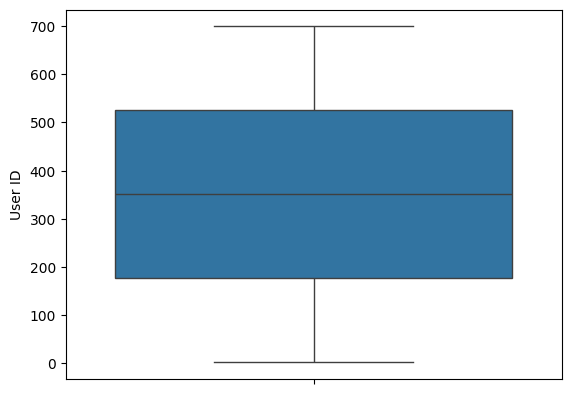

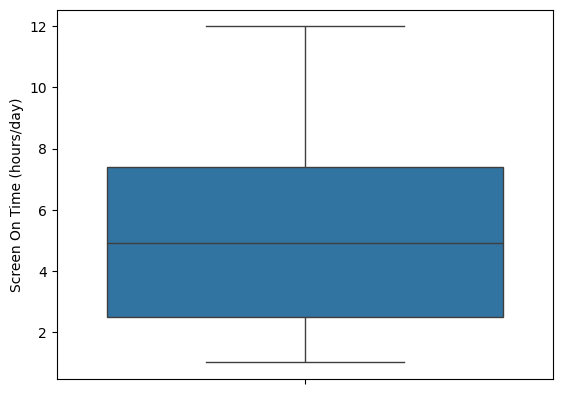

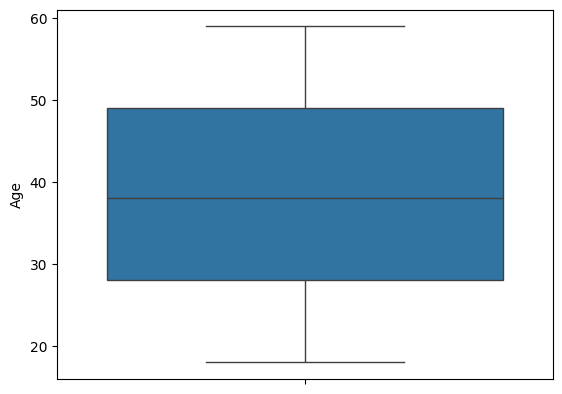

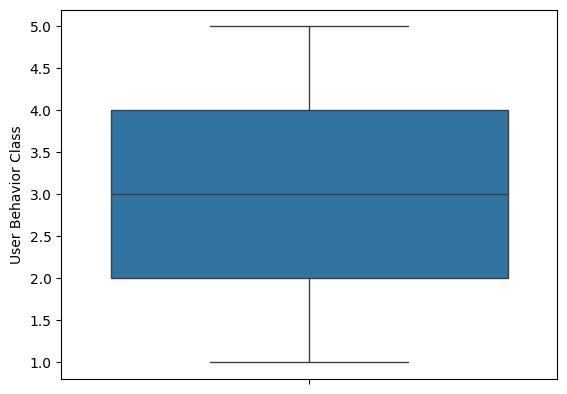

In [58]:
for i in df.select_dtypes(include="number"):
    sns.boxplot(df[i])
    plt.show()

In [59]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'Screen On Time (hours/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [60]:
df["Device Model"].value_counts()

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

In [61]:
# metthod one for lable encoding
d1={"Device Model":1,"Xiaomi Mi 11":2,"iPhone 12":3,"Google Pixel 5":4,"oneplus 9":5,"Samsung Galaxy S21":6}
df["Device Model"]=df["Device Model"].map(d1)

In [62]:
# lableencodeing method 2 from sklearn
from sklearn.preprocessing  import LabelEncoder
le=LabelEncoder()
df["Device Model"]=le.fit_transform(df["Device Model"])

In [63]:
# for loop method
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list_1=["Device Model","Operating System","Gender"]
for i in list_1:
    df[i]=le.fit_transform(df[i])

In [64]:
df.head()

,User ID,Device Model,Operating System,Screen On Time (hours/day),Age,Gender,User Behavior Class
0,1,2,0,6.4,40,1,4
1,2,4,0,4.7,47,0,3
2,3,0,0,4.0,42,1,2
3,4,2,0,4.8,20,1,3
4,5,1,1,4.3,31,0,3


In [65]:
# split the data
x=df.drop(columns=["User Behavior Class"])
y=df["User Behavior Class"]

In [66]:
x.head()

,User ID,Device Model,Operating System,Screen On Time (hours/day),Age,Gender
0,1,2,0,6.4,40,1
1,2,4,0,4.7,47,0
2,3,0,0,4.0,42,1
3,4,2,0,4.8,20,1
4,5,1,1,4.3,31,0


In [72]:
x.rename(columns={"Operating System":"OS"},inplace=True)
x.rename(columns={"Screen On Time (hours/day)":"Screen time"},inplace=True)

In [73]:
x.columns

Index(['User ID', 'Device Model', 'OS', 'Screen time', 'Age', 'Gender'], dtype='object')

In [69]:
y.head()

0    4
1    3
2    2
3    3
4    3
Name: User Behavior Class, dtype: int64

In [74]:
# split the data into 80 and 20
from sklearn.model_selection import train_test_split
x_train , x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [75]:
# find the standerdisation
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [76]:
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

In [77]:
x_train_scaled

array([[-1.36455939, -1.39947129, -0.51113722,  0.61583278, -1.43814745,
        -1.03637545],
       [-1.51956715, -1.39947129, -0.51113722,  0.19419612, -0.76771035,
         0.96490128],
       [-0.67452484,  1.47914734, -0.51113722,  0.48609842, -0.51629643,
         0.96490128],
       ...,
       [-0.42451232, -1.39947129, -0.51113722,  0.38879765,  1.24360097,
        -1.03637545],
       [ 0.40052898, -1.39947129, -0.51113722, -0.61664362, -0.34868716,
        -1.03637545],
       [-1.26455438,  0.03983803, -0.51113722, -0.90854592, -0.51629643,
        -1.03637545]])

In [78]:
# x_train_scaled
# x_test_scaled
# y_train 
# y_test


In [84]:
# linear redression 
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
#training the model
lr.fit(x_train,y_train)


# find the y_prediction
y_pred=lr.predict(x_test)

# convert the model_training in to machine understandable language (0,1)
lr=joblib.dump(lr,"linear.pkl")

In [99]:
# test how much fit the model (testing the fit)
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
print("the mse is: ",mse)
rmse=np.sqrt(mse)
print("the rsme is:",rmse)
r2=r2_score(y_test,y_pred)
print("r2_score value is: ",r2)

the mse is:  0.15084639266576033
the rsme is: 0.38838948578168325
r2_score value is:  0.9172750616606351


In [113]:
#going with logisticRegression
from sklearn.linear_model import LogisticRegression
lr1=LogisticRegression()

# model trianing
lr1.fit(x_train_scaled,y_train)

# y-prediction 
y_pred_1=lr1.predict(x_test_scaled)
print(y_pred_1)
#joblib convertion to pkl file
joblib.dump(lr1,"logistic.pkl")


[4 1 1 2 3 2 2 1 4 3 1 1 2 1 3 4 5 1 3 2 5 4 2 4 4 3 3 5 3 5 1 3 1 4 4 5 5
 1 1 2 3 4 1 4 1 5 3 3 1 2 2 1 2 1 5 5 2 1 4 2 3 2 1 2 5 2 5 1 5 5 1 3 3 2
 3 2 5 4 4 4 2 1 4 2 4 4 5 3 3 1 1 4 2 3 4 2 2 1 3 5 3 3 1 1 2 4 5 1 4 4 5
 4 4 2 3 2 4 3 4 3 3 4 5 4 5 2 3 5 4 5 3 3 1 3 2 2 5 2 1 2]


['logistic.pkl']

In [112]:
# error rate checking
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred_1)
print("mse:",mse)
rmse=np.sqrt(mse)
print("rmse:",rmse)
r2=r2_score(y_test,y_pred_1)
print("r2_score:",r2)

mse: 0.10714285714285714
rmse: 0.32732683535398854
r2_score: 0.9412423055400112


In [114]:
# KNN regression
# find the normalisation knn - generaly prefered "NORMALISATION"

from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
# normal values
x_train_normal=mm.fit_transform(x_train)
x_test_normal=mm.transform(x_test)


In [115]:
x_train_normal

array([[0.11731044, 0.        , 0.        , 0.56363636, 0.07317073,
        0.        ],
       [0.07296137, 0.        , 0.        , 0.44545455, 0.26829268,
        1.        ],
       [0.31473534, 1.        , 0.        , 0.52727273, 0.34146341,
        1.        ],
       ...,
       [0.38626609, 0.        , 0.        , 0.5       , 0.85365854,
        0.        ],
       [0.6223176 , 0.        , 0.        , 0.21818182, 0.3902439 ,
        0.        ],
       [0.14592275, 0.5       , 0.        , 0.13636364, 0.34146341,
        0.        ]])

In [118]:
# KNN model preparation 
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train_normal,y_train)

KNeighborsRegressor()

In [131]:
# find the y_pred_2
y_pred_2=knr.predict(x_test_normal)
y_pred_2


array([4. , 1.2, 1.4, 2. , 3.4, 2. , 2.4, 1.2, 4.4, 2.4, 1.2, 1.6, 1.8,
       2. , 2.6, 3.8, 4.2, 1.8, 3.8, 2.4, 5. , 3.6, 2.2, 4.4, 4. , 2.2,
       2.4, 4. , 2.6, 5. , 1.6, 2.4, 1.6, 3.4, 3.2, 5. , 4.8, 1.8, 1.6,
       2.4, 3.4, 3. , 1.6, 3.6, 1.2, 4.8, 2.4, 3. , 2.2, 2.2, 1.8, 2. ,
       1.6, 1.6, 4.8, 4.6, 2.6, 1.6, 4.2, 2.2, 2.8, 1.8, 1.6, 2. , 5. ,
       2.2, 5. , 1.6, 4.8, 4.8, 1.6, 2.2, 3.2, 2. , 2.8, 2.6, 5. , 2.8,
       3.6, 4. , 1.8, 1.6, 3. , 2.4, 3.8, 4. , 4.8, 3.2, 2.4, 1.6, 1.6,
       4.2, 2.2, 2.4, 3.8, 2.4, 2.2, 1.6, 3. , 3.8, 2.6, 2.2, 1.4, 1.4,
       2.8, 4. , 4.2, 1.4, 4. , 2.8, 4.4, 3.8, 4.2, 2. , 3.2, 2.6, 4.2,
       3.8, 3.6, 3. , 2.4, 4. , 4.6, 3.6, 4.6, 1.8, 2.8, 5. , 4.2, 5. ,
       3.6, 1.8, 1.8, 3.8, 1.4, 2.4, 4.4, 1.8, 1.6, 2.2])

In [195]:
# find the error rate
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

threshold = 0.5 
y_pred_2_classes = (y_pred_2 >= threshold).astype(int)

cm=confusion_matrix(y_test,y_pred_2_classes)
print("confussion_matrix",cm)
precision = precision_score(y_test, y_pred_2_classes, average='weighted')
print("precision :",precision)
recall = recall_score(y_test, y_pred_2_classes, average='weighted')
print("recall_score:",recall)
f1 = f1_score(y_test, y_pred_2_classes, average='weighted')
print("f1_score: ",f1)

confussion_matrix [[27  0  0  0  0]
 [29  0  0  0  0]
 [34  0  0  0  0]
 [27  0  0  0  0]
 [23  0  0  0  0]]
precision : 0.03719387755102041
recall_score: 0.19285714285714287
f1_score:  0.062360992301112056


c:\Users\sowmya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [141]:
# applying the kmnn with standerdiasation 

# Confusion matrix, accuracy, precision, recall, f1_score
# regression - mse, rmse, r^2, adjusted r^2

In [142]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

In [143]:
# Train the model
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [146]:
# Prediction
y_pred2 = knn.predict(x_test_scaled)
y_pred2

array([4, 1, 1, 2, 3, 1, 3, 1, 5, 2, 1, 1, 1, 2, 2, 4, 4, 1, 5, 2, 5, 4,
       2, 4, 4, 2, 2, 3, 2, 5, 2, 2, 2, 3, 3, 5, 5, 1, 1, 3, 3, 3, 1, 4,
       1, 5, 2, 2, 2, 2, 1, 1, 1, 1, 5, 5, 3, 2, 4, 1, 2, 1, 1, 1, 5, 2,
       5, 2, 5, 5, 2, 2, 3, 2, 3, 3, 5, 3, 4, 4, 2, 2, 3, 2, 4, 3, 5, 3,
       2, 1, 2, 4, 2, 2, 4, 2, 1, 1, 3, 4, 3, 2, 1, 1, 4, 4, 4, 1, 3, 3,
       4, 3, 4, 2, 3, 2, 4, 4, 4, 2, 2, 4, 5, 4, 5, 2, 2, 5, 4, 5, 4, 1,
       2, 4, 1, 2, 5, 2, 1, 2])

In [147]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [167]:
cm1=confusion_matrix(y_test,y_pred2)
print(cm1)
ac=accuracy_score(y_test,y_pred2)
print(ac)
pr=precision_score(y_test,y_pred2,average="macro")
print(pr)
rc=recall_score(y_test,y_pred2,average="macro")
print(rc)
f1=f1_score(y_test,y_pred2,average="macro")
print(f1)

[[17 10  0  0  0]
 [12 14  3  0  0]
 [ 0 18 10  5  1]
 [ 0  0  8 18  1]
 [ 0  0  1  4 18]]
0.55
0.5881504702194358
0.5711562519393898
0.5725055760922122


In [176]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
#trainn the dat
dt.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [177]:
# find the y_prediction3
y_pred_3=dt.predict(x_test_scaled)
y_pred_3

array([4, 1, 1, 2, 3, 2, 2, 1, 4, 3, 1, 1, 2, 1, 3, 4, 5, 1, 3, 2, 5, 4,
       3, 4, 4, 2, 3, 5, 3, 5, 1, 3, 1, 4, 4, 5, 5, 1, 1, 2, 3, 4, 1, 4,
       1, 5, 3, 3, 1, 3, 2, 2, 2, 1, 5, 5, 3, 1, 4, 2, 3, 2, 1, 2, 5, 3,
       5, 1, 5, 5, 1, 2, 3, 2, 3, 2, 5, 3, 4, 4, 2, 1, 4, 3, 4, 4, 5, 3,
       4, 1, 1, 4, 2, 3, 4, 2, 2, 1, 3, 5, 3, 3, 1, 1, 2, 4, 5, 1, 4, 4,
       5, 4, 4, 3, 3, 2, 4, 3, 4, 3, 3, 4, 5, 4, 5, 2, 3, 5, 4, 5, 3, 3,
       1, 3, 2, 2, 5, 2, 1, 2])

In [197]:
# cost function
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cm1=confusion_matrix(y_test,y_pred_3)
print("confusion_matrix: ",cm1)
ac1=accuracy_score(y_test,y_pred_3)
print("accuracy : ",ac1)
pr1=precision_score(y_test,y_pred_3,average="macro")
print("precisison: ",pr1)
rs1=recall_score(y_test,y_pred_3,average="macro")
print("recall_score: ",rs1)
f11=f1_score(y_test,y_pred_3,average="macro")
print("f1_score : ",f11)

confusion_matrix:  [[27  0  0  0  0]
 [ 1 25  3  0  0]
 [ 0  2 29  3  0]
 [ 0  0  1 26  0]
 [ 0  0  0  0 23]]
accuracy :  0.9285714285714286
precisison:  0.93311024862749
recall_score:  0.9355946209901586
f1_score :  0.9337836790075595


In [193]:
# --linear regression error rate == the 
# mse is:  0.15084639266576033
# rsme is: 0.38838948578168325
# r2_score value is:  0.9172750616606351

#--logistic regression
#


In [194]:

#--logistic regression
# mse: 0.10714285714285714
# rmse: 0.32732683535398854
# r2_score: 0.9412423055400112

In [196]:
#knn scores
#[[27  0  0  0  0]
 #[29  0  0  0  0]
 #[34  0  0  0  0]
 #[27  0  0  0  0]
 #[23  0  0  0  0]]
#precision : 0.03719387755102041
#recall_score: 0.19285714285714287
#f1_score:  0.062360992301112056

In [ ]:
# desicion tree
#[[27  0  0  0  0]
 #[ 1 25  3  0  0]
 #[ 0  2 29  3  0]
 #[ 0  0  1 26  0]
 #[ 0  0  0  0 23]]
# accuracy :  0.9285714285714286
# precisison:  0.93311024862749
# recall_score:  0.9355946209901586
# f1_score :  0.9337836790075595